In [40]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [41]:
# importing dataset
df = pd.read_csv('online_shopper.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [42]:
#initial data exploration and prep
#dataset info
df.info()

#missing values
df.isnull().sum() #there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

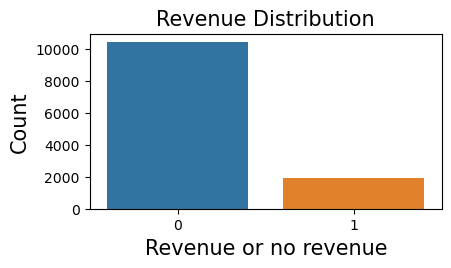

In [49]:
# visualising the distribution of customers on target feature - 'Revenue'

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(2, 2, 2)
sns.countplot(x='Revenue', data=df)
plt.title('Revenue Distribution', fontsize=15)
plt.xlabel('Revenue or no revenue', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show()

In [50]:
#checking value count of Revenue (target)
df['Revenue'].value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

<Axes: ylabel='count'>

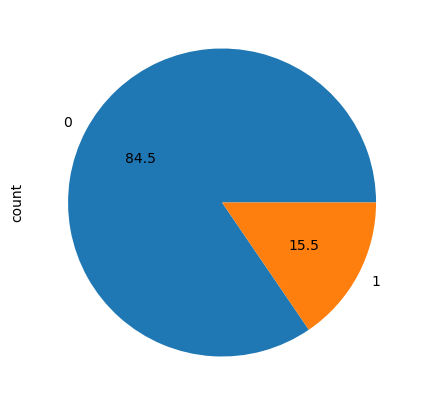

In [51]:
#visualising class imbalance of Revenue using a pie chart
df['Revenue'].value_counts().plot.pie(autopct='%.1f')

In [53]:
# feature encoding to replace False with 0 and True with 1
df.replace({False: 0, True: 1}, inplace=True)

In [52]:
# identifying numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print(numeric_features,'\n')
print(categorical_features)

#ensuring categorical columns are treated as object dtype columns
categorical_features = ['Month', 'VisitorType', 'Weekend']

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object') 

Index(['Month', 'VisitorType'], dtype='object')


In [ ]:
# Splitting the data
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identifying numeric and categorical columns again in train and test data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# preprocessing pipelines for numeric and categorical columns
# data standardising to avoid preference to higher weight
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# encoding categorical columns using onehotencoder
# avoiding dummy variable trap
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

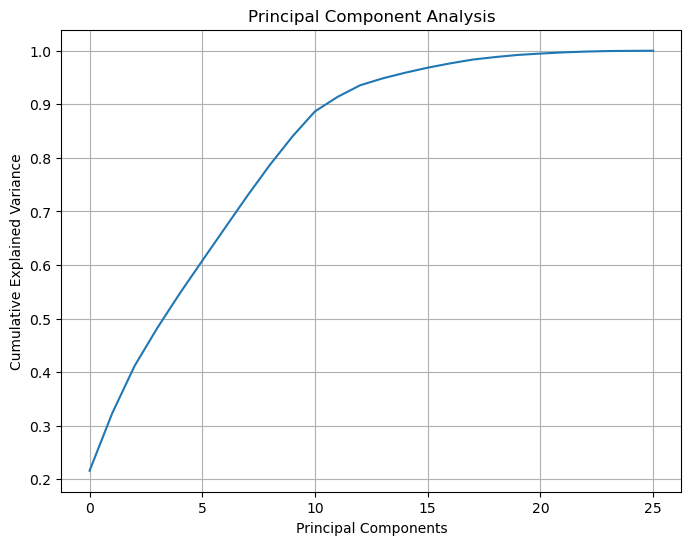

In [48]:
#combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Dimensionality reduction
# using PCA to determine the amount of variance explained by each component
pca_temp = Pipeline(steps=[('preprocessor', preprocessor), ('pca', PCA())])
pca_temp.fit(X_train)

# plotting explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_temp.named_steps['pca'].explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Principal Component Analysis')
plt.grid(True)
plt.show()

# set number of components to retain 95% variance
pca = PCA(n_components=0.95)

In [33]:
# model application
# running three models Decision Tree, KNN and SVM
# applying SMOTE to handle class imbalance

models_smote = {
    'Decision Tree using SMOTE': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('smote', SMOTE(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))]),
    
    'KNN using SMOTE': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('smote', SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier())]),
    
    'SVM using SMOTE': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('smote', SMOTE(random_state=42)),
        ('classifier', SVC(probability=True, random_state=42))])
}

In [34]:
# applying random over sampling to handle class imbalance

models_ros = {
    'Decision Tree using ROS': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('ros', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))]),
    
    'KNN using ROS': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('ros', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier())]),
    
    'SVM using ROS': ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('ros', RandomOverSampler(random_state=42)),
        ('classifier', SVC(probability=True, random_state=42))])
}

In [35]:
# training and model evaluation

def models_evaluation(models, X_train, X_test, y_train, y_test):
    results = {}
    confusion_matrices = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[model_name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'AUC-ROC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }
        confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)
    return results, confusion_matrices

In [36]:
# performance of models with SMOTE scenario
results_smote, confusion_matrices_smote = models_evaluation(models_smote, X_train, X_test, y_train, y_test)

# performance of models with random over sampling scenario
results_ros, confusion_matrices_ros = models_evaluation(models_ros, X_train, X_test, y_train, y_test)

# combining both of the results
results_combined = {**results_smote, **results_ros}
confusion_matrices_combined = {**confusion_matrices_smote, **confusion_matrices_ros}

# display the results
results_df = pd.DataFrame(results_combined).T
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']])

                           Accuracy Precision    Recall  F1 Score   AUC-ROC
Decision Tree using SMOTE  0.793187  0.385528  0.568182  0.459364  0.701264
KNN using SMOTE            0.782374  0.382442  0.662587  0.484965  0.786419
SVM using SMOTE             0.86591  0.552342  0.701049  0.617874  0.882469
Decision Tree using ROS    0.826169  0.436036  0.423077  0.429459   0.66149
KNN using ROS              0.781292  0.378958  0.648601  0.478401  0.769915
SVM using ROS              0.862125   0.54047  0.723776  0.618834  0.884094


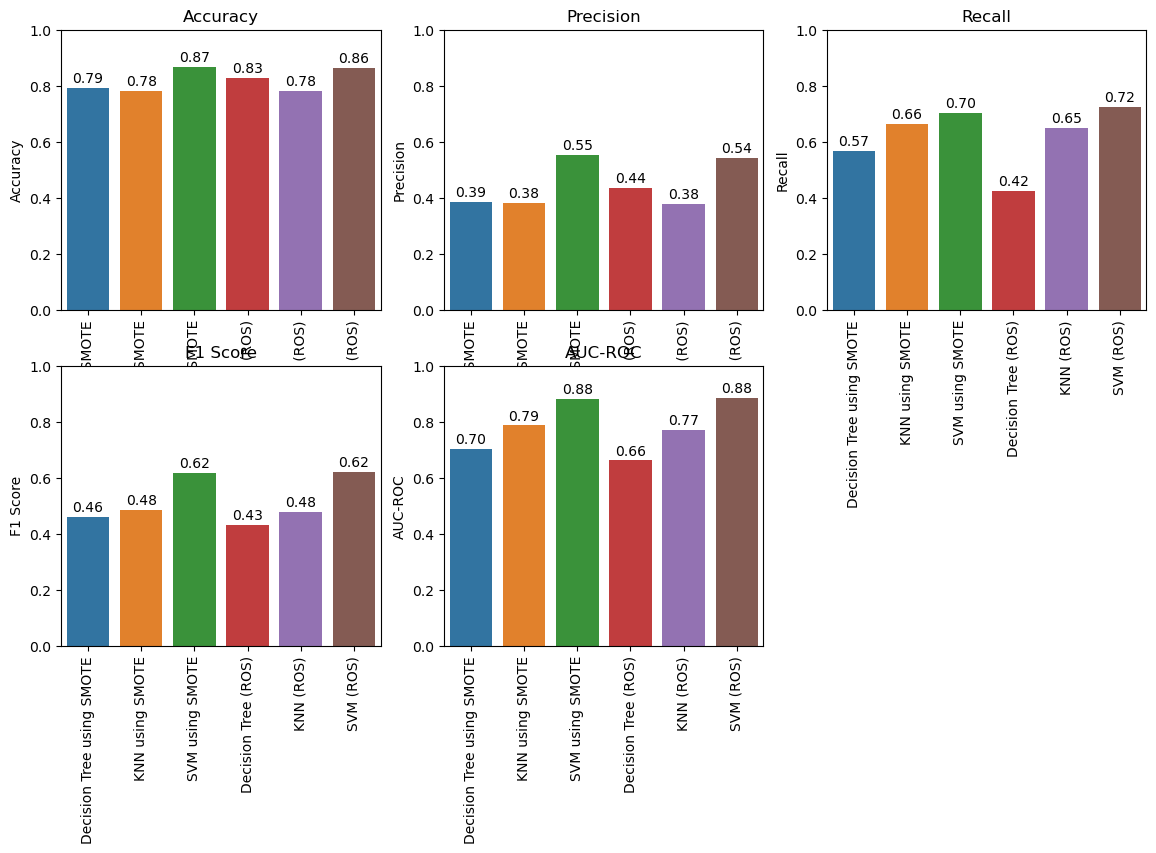

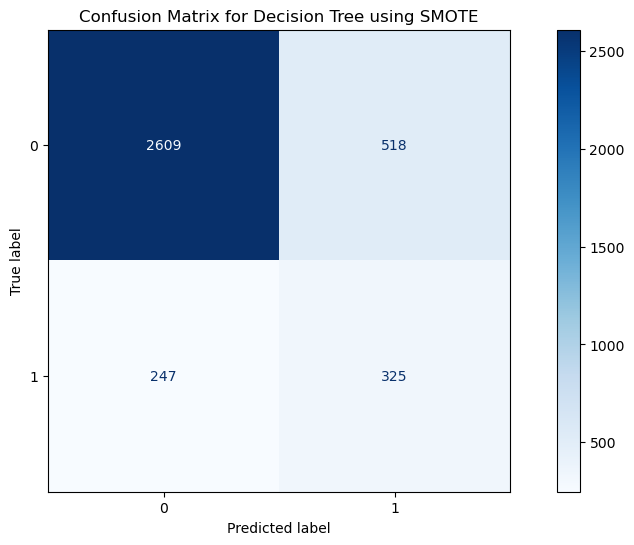

Decision Tree using SMOTE:
True Positives: 325
True Negatives: 2609
False Positives: 518
False Negatives: 247



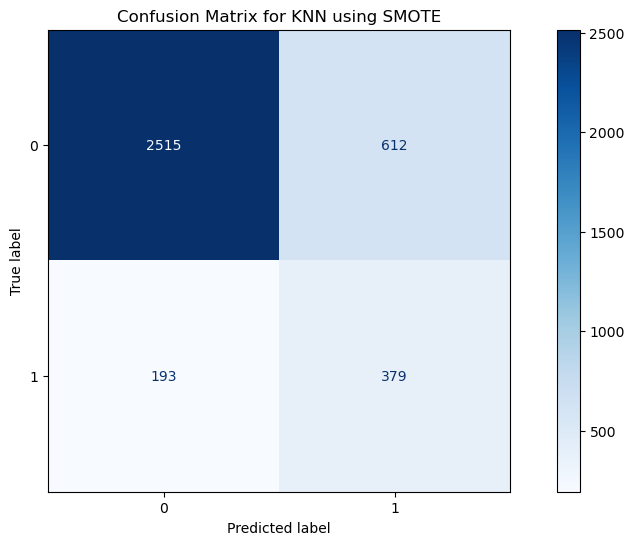

KNN using SMOTE:
True Positives: 379
True Negatives: 2515
False Positives: 612
False Negatives: 193



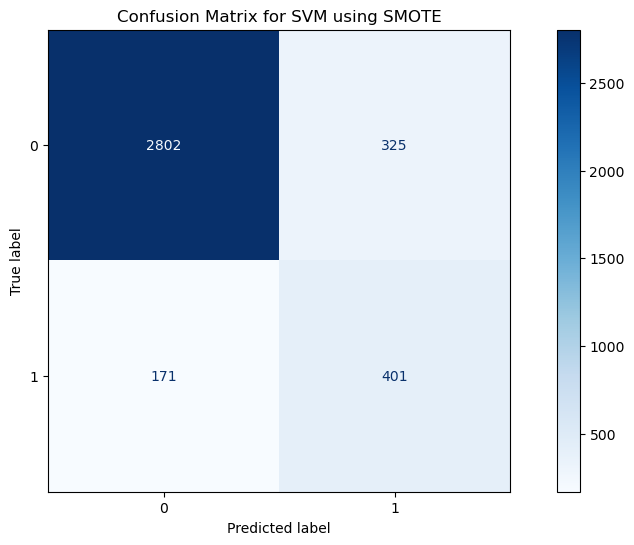

SVM using SMOTE:
True Positives: 401
True Negatives: 2802
False Positives: 325
False Negatives: 171



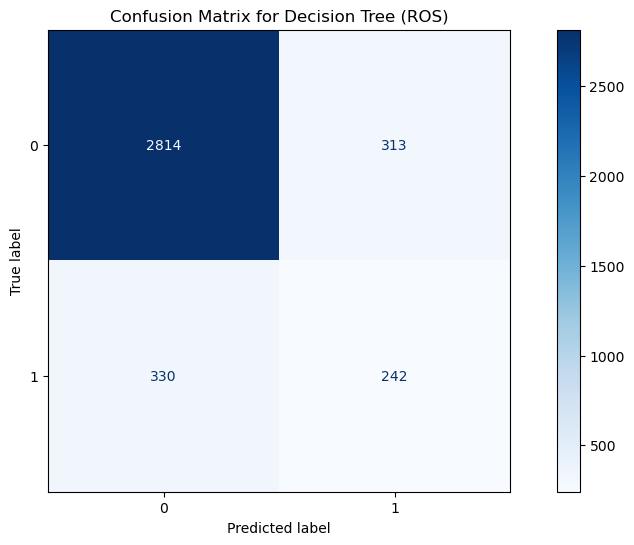

Decision Tree (ROS):
True Positives: 242
True Negatives: 2814
False Positives: 313
False Negatives: 330



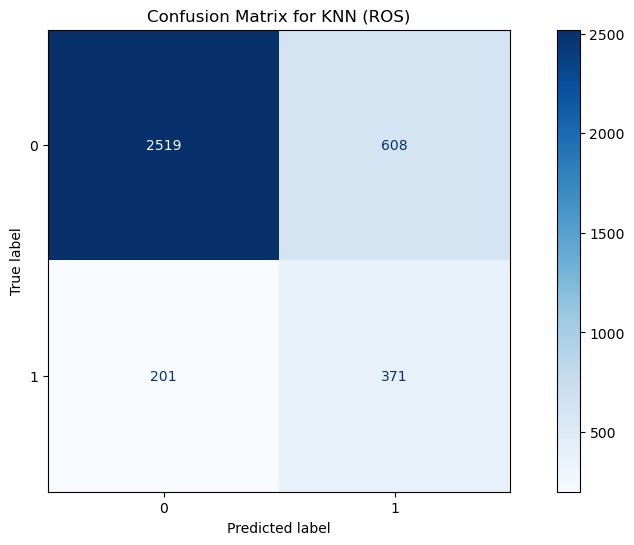

KNN (ROS):
True Positives: 371
True Negatives: 2519
False Positives: 608
False Negatives: 201



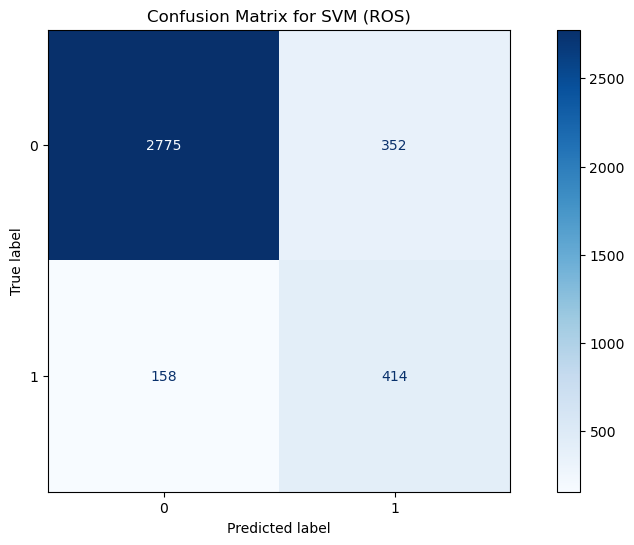

SVM (ROS):
True Positives: 414
True Negatives: 2775
False Positives: 352
False Negatives: 158



In [28]:
# visualising the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(metric)
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    for j, score in enumerate(results_df[metric]):
        plt.text(j, score + 0.02, f'{score:.2f}', ha='center')
#plt.tight_layout()
plt.show()

# visualising confusion matrices
for model_name, cm in confusion_matrices_combined.items():
    tn, fp, fn, tp = cm.ravel()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print(f'{model_name}:')
    print(f'True Positives: {tp}')
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print()